<div style="display: flex; background-color: RGB(66,108,100);" >
<h1 style="margin: auto; padding: 30px; font-size:3em;color:#fff; ">Counterfeit Currency Detection Project</h1>
</div>

<div style="border: 1px solid RGB(66,108,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(66,108,100);font-size:1.6em; ">Algorithm for Automatic Detection of Counterfeit Banknotes</h3>
</div>

## Workflow Overview:
1. Project Overview
2. Setting Up the Work Environment: Import Necessary Libraries and Define Utility Functions.
3. Data Loading and Exploration: Loading the Dataset , Clean and preprocess the dataset.
4. Exploratory Data Analysis (EDA): Explore and visualize the data.
5. Building and training models and Evaluation: Train and compare models.
6. Adding Extra Columns and Model Tuning: Add predictions and save outputs.
7. Model Deployment : Save the model and suggest deployment ideas.


## <span style="color:green; font-size:1.5em;">1. Project Overview</span>

### Objective:
Develop an algorithsm to classify banknotes as genuine or counterfeit based on their geometric properties.

### Dataset:
- **Total Samples**: 1,500 banknotes.
- **Features**:
  - Length.
  - Height (left and right).
  - Upper and lower margins.
  - Diagonal.
- **Target Variable**: `is_genuine` (True for genuine, False for counterfeit).

### Algorithms to Implement:
- Logistic Regression.
- K-Means Clustering.
- K-Nearest Neighbors (KNN).
- Random Fost in the currency.

### Expected Outcomes:
1. A comparison table of model performance using accuracy, precision, recall, and F1-score.
2. Identification of the best-performing mod cou
### Evaluation Metrics:
1. Accur.
2. ROC-AUC (for classification models).

## <span style="color:green; font-size:1.5em;">2. Setting Up the Work Environment</span>

## Objective:
Set up the development environment by importing required libraries for data processing, visualization, and modeling. Define any utility functions that might be used for cleaning, transforming, or visualizing data.

-----------------------------------------------------------------------------

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">2.1 Import Necessary Libraries:</span>

In [528]:
# Core Libraries :pandas, numpy.
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations

# Visualization Libraries :matplotlib, seaborn.
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced visualizations
import matplotlib

# Machine Learning Libraries :sklearn modules.
from sklearn.preprocessing import StandardScaler  # For scaling features
from sklearn.model_selection import train_test_split  # For data splitting
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score# For evaluation
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.cluster import KMeans  # K-Means clustering
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.neighbors import KNeighborsClassifier  # KNN model
from sklearn.decomposition import PCA  # For PCA
from scipy.stats import ttest_ind 
from flask import Flask, request, jsonify 
from imblearn.over_sampling import SMOTE
from sklearn.cluster import DBSCAN
#-----------------------------------------------------------------------------
# Model Saving and Loading
import joblib  
#Versions des librairies
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)


#Thème pour Seaborn
sns.set_theme(style="darkgrid", palette="pastel")
# Suppress warnings for a clean output
import warnings
warnings.filterwarnings("ignore")


NumPy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.4
Seaborn version: 0.13.2


### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">2.2 Define Utility Functions:</span>

In [530]:
# Function to plot a heatmap of correlations between the features of a dataset
def plot_heatmap_correlation(data, title):

    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()
#--------------------------------------------------------------------
# Function to check and visualize missing values in the dataset
def check_missing_values(data):
    missing = data.isnull().sum()
    print("Missing Values:")
    print(missing[missing > 0])
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values Heatmap")
    plt.show()

## <span style="color:green; font-size:1.5em;">3. Data Loading and Exploration</span>

## Objective:
Load the dataset into the workspace, initial exploration, and clean the data by handling missing values, duplicates, and irrelevant columns.ing.

## Description:
- **Loading the Data**: Load the dataset from a CSV file or database into a pandas DataFrame.
- **Data Exploration**: Explore the dataset by checking the dimensions, the first few rows, column types, missing values, and statistical summary.
- **Data Cleaning**: Remove any irrelevant columns, handle missing data, and correct data types to prepare the dataset for modeling.

------------------------

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">3.1 Loading the Dataset:</span>

In [535]:
#load data as a data frame 
df_billets = pd.read_csv('billets.csv', delimiter=';')

In [536]:
#display the first five lines
df_billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">3.2 Checking Data Information:</span>

In [538]:
#Data frame shape
print(f"Rows: {df_billets.shape[0]}, Columns: {df_billets.shape[1]}")

Rows: 1500, Columns: 7


In [539]:
#Check data Information 
df_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [540]:
# Check data types
print("Data types before cleaning:")
print(df_billets.dtypes)

Data types before cleaning:
is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object


In [541]:
# Check for missing values
print("Missing values in each column:")
df_billets.isnull().sum()

Missing values in each column:


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [542]:
# Rows where 'margin_low' is null
missing_margin_low = df_billets[df_billets['margin_low'].isnull()]
print(missing_margin_low)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53 

In [543]:
# Check for duplicate rows
duplicates = df_billets.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">3.3 Handling Missing Data:</span >

Missing Values:
margin_low    37
dtype: int64


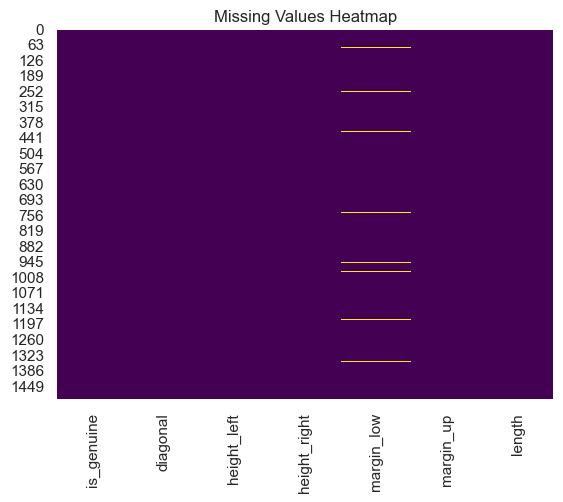

In [545]:
# Visualize missing data
check_missing_values(df_billets)

In [546]:
# Separate missing values by `is_genuine`
true_missing = df_billets.loc[(df_billets['is_genuine'] == True) & (df_billets['margin_low'].isnull())]
false_missing = df_billets.loc[(df_billets['is_genuine'] == False) & (df_billets['margin_low'].isnull())]

# Count missing values in each category
print(f"Missing values in genuine banknotes: {true_missing.shape[0]}")
print(f"Missing values in counterfeit banknotes: {false_missing.shape[0]}")

Missing values in genuine banknotes: 29
Missing values in counterfeit banknotes: 8


In [547]:
#Compute means for `margin_low` for each category
genuine_mean = df_billets.loc[df_billets['is_genuine'] == True, 'margin_low'].mean()
counterfeit_mean = df_billets.loc[df_billets['is_genuine'] == False, 'margin_low'].mean()

print(f"Genuine banknotes mean for margin_low: {genuine_mean}")
print(f"Counterfeit banknotes mean for margin_low: {counterfeit_mean}")

Genuine banknotes mean for margin_low: 4.116096807415037
Counterfeit banknotes mean for margin_low: 5.215934959349593


In [548]:
# Replace missing values with respective means
df_billets.loc[(df_billets['is_genuine'] == True) & (df_billets['margin_low'].isnull()), 'margin_low'] = genuine_mean
df_billets.loc[(df_billets['is_genuine'] == False) & (df_billets['margin_low'].isnull()), 'margin_low'] = counterfeit_mean

# Verify that all missing values have been replaced
missing_after = df_billets['margin_low'].isnull().sum()
print(f"Total missing values in margin_low after replacement: {missing_after}")
#Check data statistics after replacement: 
df_billets.describe()

Total missing values in margin_low after replacement: 0


diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.482710     3.151473   
std       0.305195     0.299462      0.325627     0.659735     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.030000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [549]:
# Check again for missing values
print("Missing values after handling:")
print(df_billets.isnull().sum())

Missing values after handling:
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">3.4 Checking Feature Correlations:</span >
First, we must study the data and know the relationship between the features in the data to know how to study it.

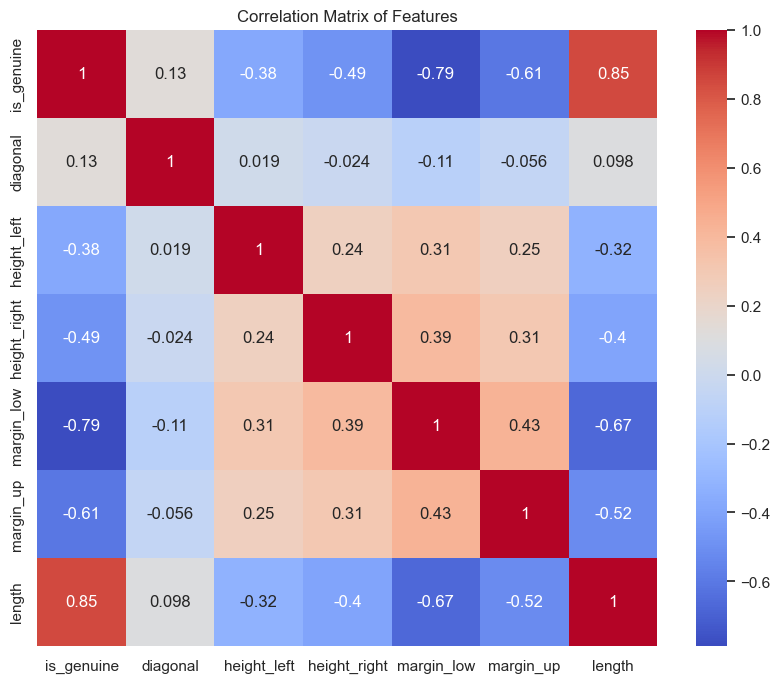

In [551]:
# Visualizing correlations between features
plot_heatmap_correlation(df_billets, 'Correlation Matrix of Features')

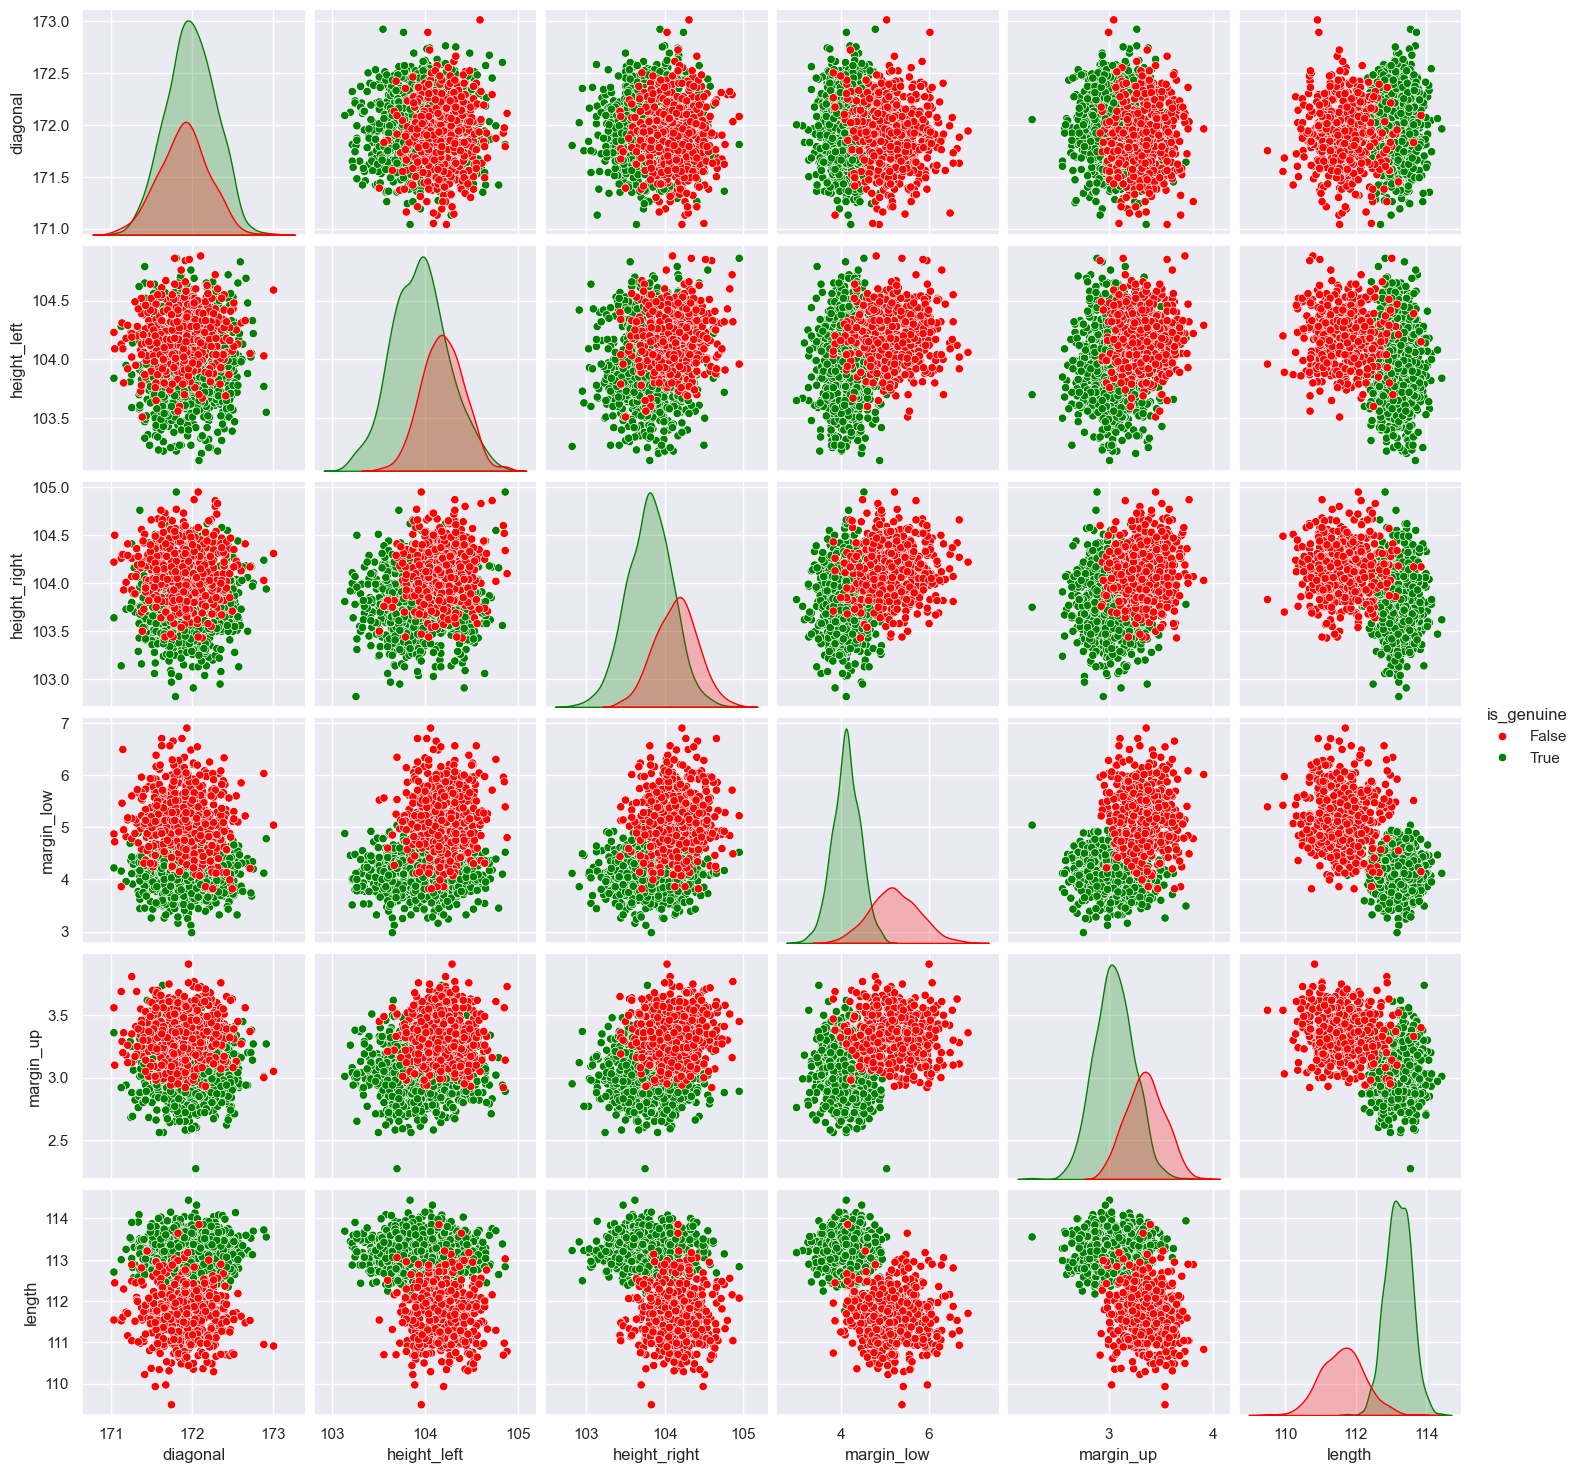

In [552]:
# Scatter plot to visualize relationships
sns.pairplot(df_billets, hue='is_genuine', palette={True: 'green', False: 'red'})
plt.show()

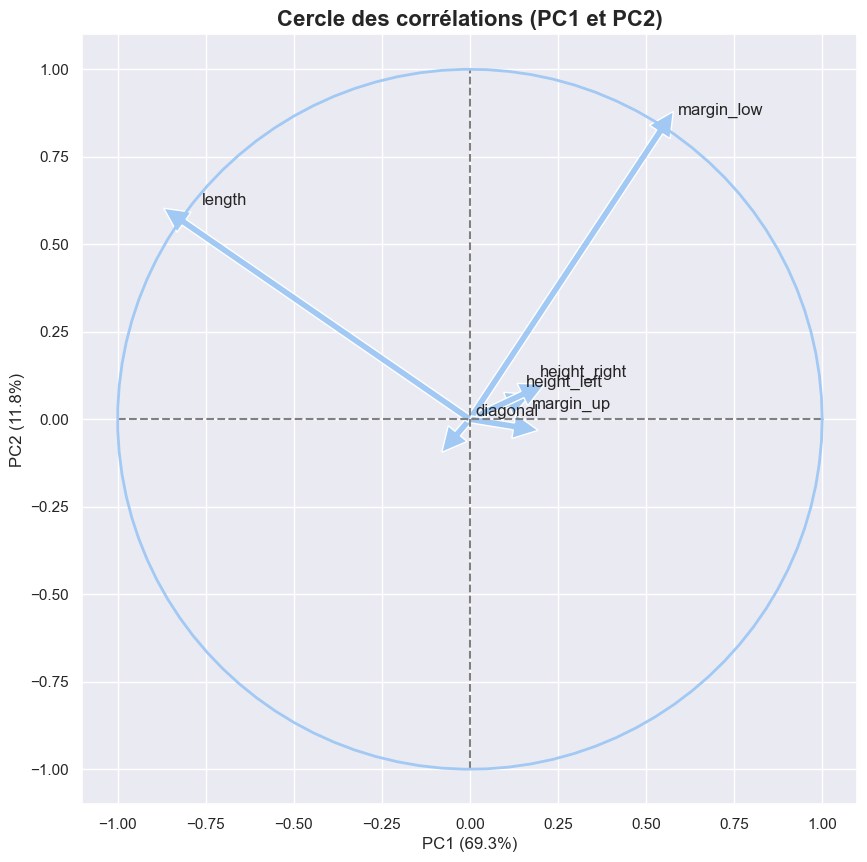

In [553]:
features = ['diagonal', 'height_left', 'height_right',  'margin_low','margin_up','length' ]

X = df_billets[features]
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
# Cercle des corrélations
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0, 0, 
             pca.components_[0, i],  # PC1
             pca.components_[1, i],  # PC2
             head_width=0.07, head_length=0.07, width=0.02)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             X.columns[i])

# Horizontal and vertical lines
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# Axis labels with explained variance ratio
plt.xlabel('PC{} ({}%)'.format(1, round(100 * pca.explained_variance_ratio_[0], 1)))
plt.ylabel('PC{} ({}%)'.format(2, round(100 * pca.explained_variance_ratio_[1], 1)))

# Title
plt.title("Cercle des corrélations (PC{} et PC{})".format(1, 2), fontsize=16, fontweight="bold")

# Adding the unit circle
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), 
         np.sin(np.linspace(0, 2 * np.pi, 100)), 
         linewidth=2)

plt.show()


### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">3.5 Handle Outliers:</span >

In [555]:
# Calculate the interquartile range (IQR) and detect outliers
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
    
# Apply outlier detection to each feature.
features = ['diagonal', 'height_left', 'height_right',  'margin_low','margin_up','length' ]
for feature in features:
    outliers = detect_outliers(df_billets, feature)
    print(f"Number of outliers in {feature}: {outliers.shape[0]}")


Number of outliers in diagonal: 7
Number of outliers in height_left: 6
Number of outliers in height_right: 11
Number of outliers in margin_low: 25
Number of outliers in margin_up: 3
Number of outliers in length: 3


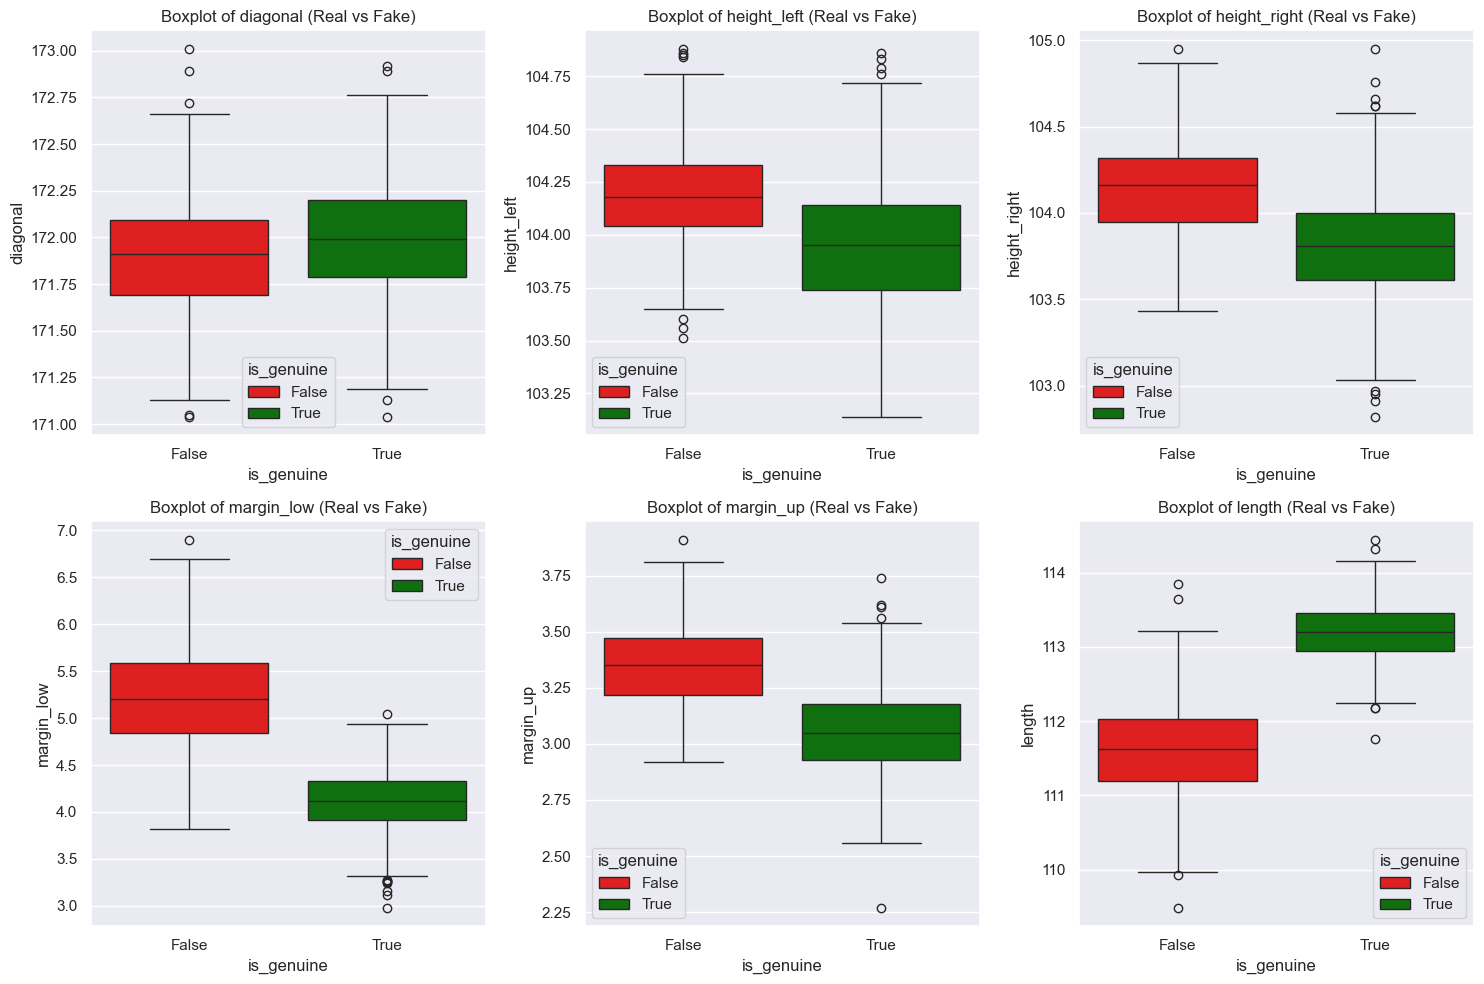

In [556]:
features = ['diagonal', 'height_left', 'height_right',  'margin_low','margin_up','length' ]
#Boxplot drawing for each purpose with training between original and fake papers
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_genuine', y=feature, data=df_billets, hue='is_genuine', palette={True: 'green', False: 'red'})
    plt.title(f'Boxplot of {feature} (Real vs Fake)')
    plt.xlabel('is_genuine')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [557]:
#### Function to detect outliers using Z-score
from scipy.stats import zscore

def detect_outliers_zscore(data, feature, threshold=3):
    z_scores = zscore(data[feature])
    outliers = data[np.abs(z_scores) > threshold]
    return outliers

#### Apply Z-score outlier detection
for feature in features:
    z_outliers = detect_outliers_zscore(df_billets, feature)
    print(f"Z-score outliers in {feature}: {z_outliers.shape[0]}")

#### Winsorize outliers to handle extreme values
from scipy.stats import mstats
  
for feature in features:
    df_billets[feature] = mstats.winsorize(df_billets[feature], limits=[0.01, 0.01])
    



Z-score outliers in diagonal: 6
Z-score outliers in height_left: 0
Z-score outliers in height_right: 4
Z-score outliers in margin_low: 9
Z-score outliers in margin_up: 2
Z-score outliers in length: 3


--------------------------------------------

***detect_outliers_zscore***: The function detects outliers in a given feature by calculating the Z-score and identifying values that exceed the specified threshold.

***Winsorizing outliers***: The process replaces extreme values in the feature columns by limiting them to a specified percentile range, reducing the impact of outliers on the model.

-----------------------------------

## <span style="color:green; font-size:1.5em;">4. Exploratory Data Analysis (EDA)</span>

## Objective:
Conduct an in-depth analysis of the data to understand its structure, relationships between features, and any underlying patterns.


## Description:

- **Visualize Distributions**: Plot histograms, or density plots to understand the distribution of key features.
- **Correlation Analysis**: Create a heatmap or scatter plots to check for correlations between features.
- **Target Class Analysis**: Investigate how the target variable (genuine or counterfeit) is distributed across the features.

--------------

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">4.1 Summary Statistics of the Data:</span >

In [563]:
#Check data statistics
df_billets.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.957967   104.029147    103.920127     4.481670     3.151513   
std       0.298848     0.295110      0.319652     0.649622     0.228416   
min     171.260000   103.310000    103.150000     3.410000     2.660000   
25%     171.750000   103.820000    103.710000     4.030000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     172.610000   104.670000    104.660000     6.250000     3.680000   

            length  
count  1500.000000  
mean    112.679607  
std       0.864141  
min     110.500000  
25%     112.030000  
50%     112.960000  
75%     113.340000  
max     113.980000

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">4.2 Target Variable Distribution:</span >

Counts of Real and Fake Bills:
is_genuine
True     1000
False     500
Name: count, dtype: int64

Percentages of Real and Fake Bills:
is_genuine
True     66.666667
False    33.333333
Name: count, dtype: float64




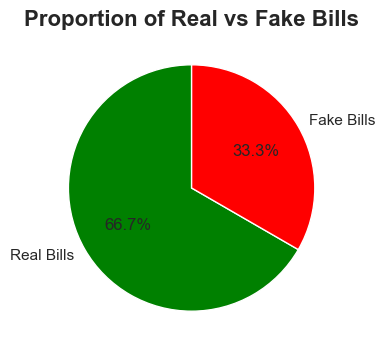

In [565]:
# Count and percentage of each class
counts = df_billets['is_genuine'].value_counts()

percentages = (counts / len(df_billets)) * 100

print("Counts of Real and Fake Bills:")
print(counts)
print("\nPercentages of Real and Fake Bills:")
print(percentages)
print("\n")
#------------------------------------------------
# Visualize target variable distribution
plt.figure(figsize=(4, 4)) 
colors = ['green', 'red'] 
plt.pie(counts, labels=['Real Bills', 'Fake Bills'], startangle=90, autopct='%1.1f%%', colors=colors)
plt.title('Proportion of Real vs Fake Bills', fontsize=16, fontweight="bold")
plt.show()

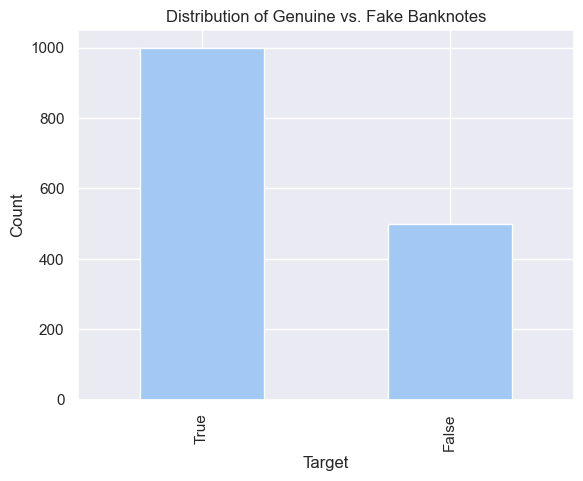

In [566]:
# Checking the distribution of the target variable
df_billets['is_genuine'].value_counts().plot(kind='bar')
plt.title('Distribution of Genuine vs. Fake Banknotes')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [567]:
# Divide the data into two groups: original and fake.
true_bills = df_billets[df_billets['is_genuine'] == True]
false_bills = df_billets[df_billets['is_genuine'] == False]

In [568]:
print("Real Bills Statistics:\n")
print(true_bills.describe())
print("\nFake Bills Statistics:\n")
print(false_bills.describe())

Real Bills Statistics:

          diagonal  height_left  height_right   margin_low  margin_up  \
count  1000.000000  1000.000000   1000.000000  1000.000000  1000.0000   
mean    171.986150   103.949440    103.809830     4.118287     3.0531   
std       0.295892     0.295972      0.286165     0.308704     0.1834   
min     171.260000   103.310000    103.150000     3.410000     2.6600   
25%     171.790000   103.740000    103.610000     3.910000     2.9300   
50%     171.990000   103.950000    103.810000     4.116097     3.0500   
75%     172.200000   104.140000    104.000000     4.330000     3.1800   
max     172.610000   104.670000    104.660000     5.040000     3.6800   

            length  
count  1000.000000  
mean    113.200590  
std       0.354912  
min     111.760000  
25%     112.950000  
50%     113.205000  
75%     113.460000  
max     113.980000  

Fake Bills Statistics:

         diagonal  height_left  height_right  margin_low   margin_up  \
count  500.000000    500.00000  

In [569]:
real_means = true_bills.mean()

fake_means = false_bills.mean()

differences = real_means - fake_means
print("Differences Between Real and Fake Bills:")
print(differences)

Differences Between Real and Fake Bills:
is_genuine      1.000000
diagonal        0.084550
height_left    -0.239120
height_right   -0.330890
margin_low     -1.090148
margin_up      -0.295240
length          1.562950
dtype: float64


In [570]:
#Aggrégation par la moyenne en fonction de la validité
df_billets.groupby('is_genuine').mean()

diagonal  height_left  height_right  margin_low  margin_up  \
is_genuine                                                                
False       171.90160    104.18856     104.14072    5.208435    3.34834   
True        171.98615    103.94944     103.80983    4.118287    3.05310   

               length  
is_genuine             
False       111.63764  
True        113.20059

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">4.3 Scatter Plot for  Relationships:</span >

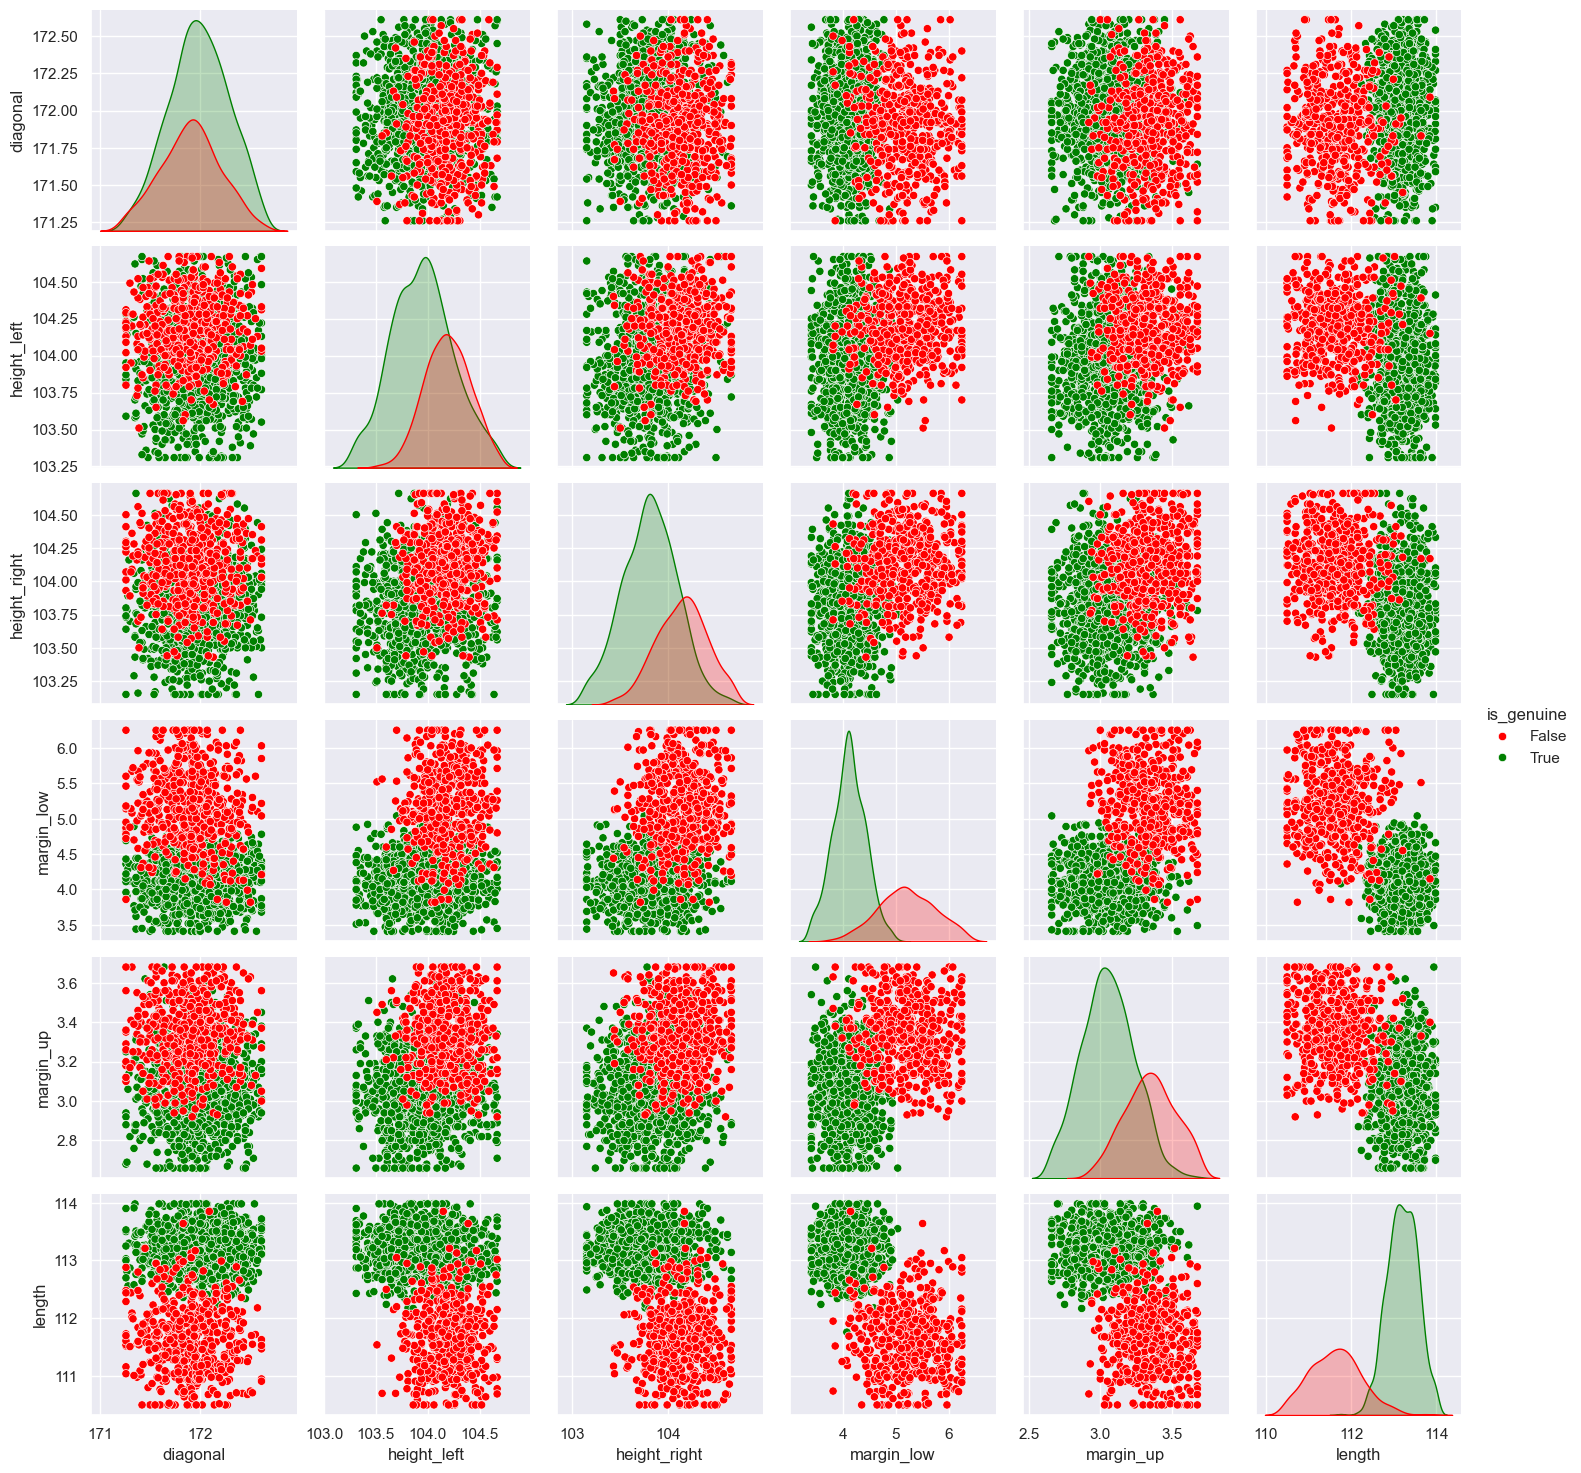

In [572]:
# Scatter plot to visualize relationships
sns.pairplot(df_billets, hue='is_genuine', palette={True: 'green', False: 'red'})
plt.show()

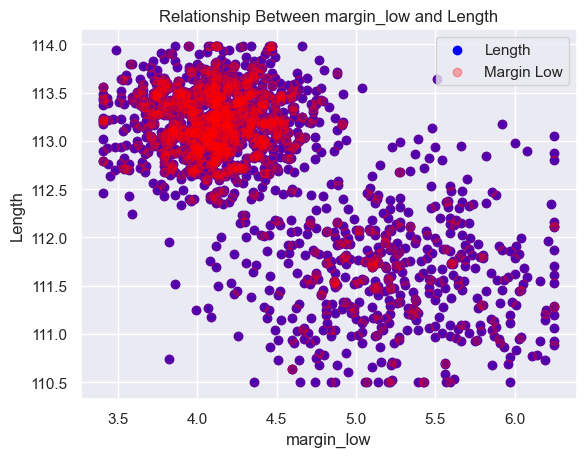

In [573]:
# Scatter plot for 'margin_low' and 'length'
plt.scatter(df_billets['margin_low'], df_billets['length'], color='blue', alpha=1, label='Length')
plt.scatter(df_billets['margin_low'], df_billets['length'], color='red', alpha=0.3, label='Margin Low')
plt.title("Relationship Between margin_low and Length")
plt.xlabel("margin_low")
plt.ylabel("Length")
plt.legend()
plt.show()

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">4.4 Analyze Feature Distributions:</span >

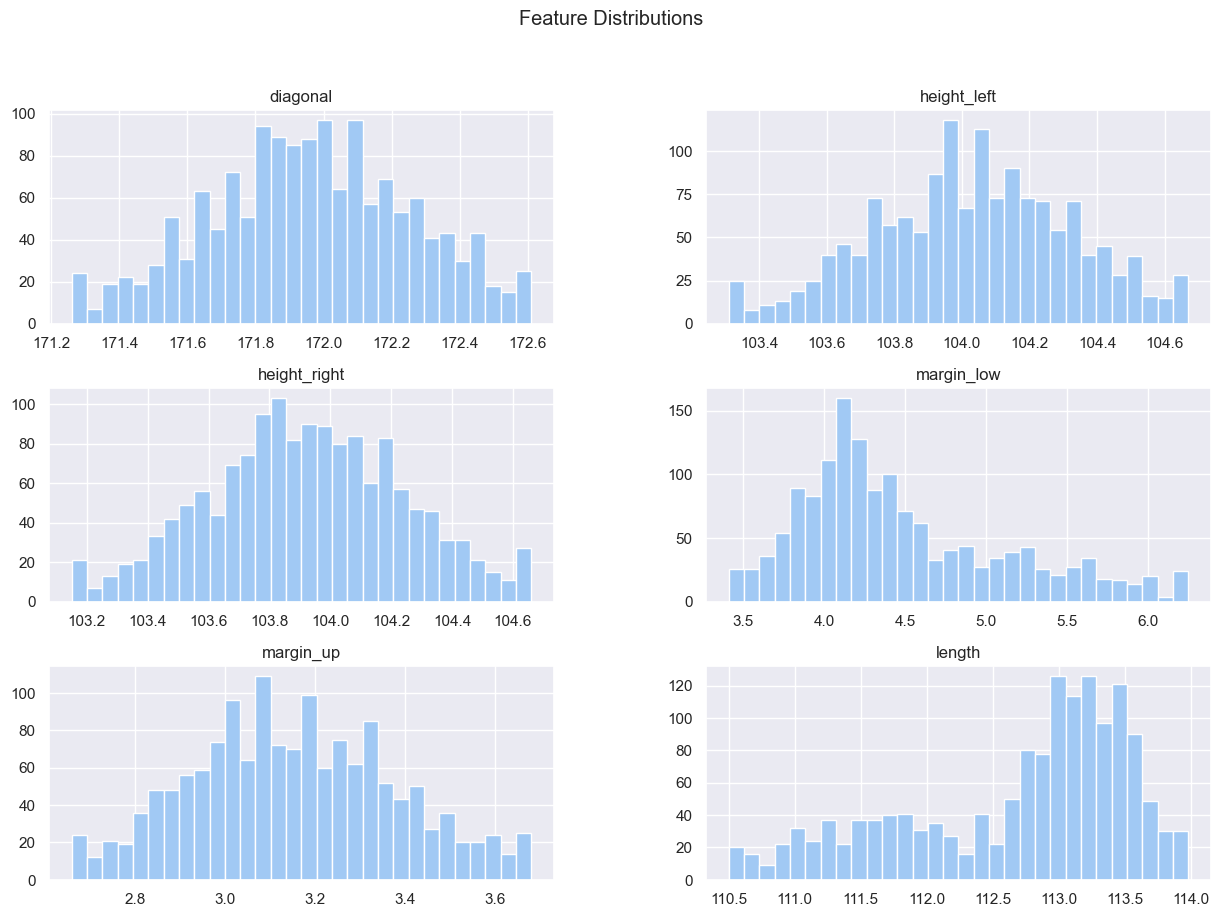

In [575]:
# Histograms for all features 
df_billets.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()


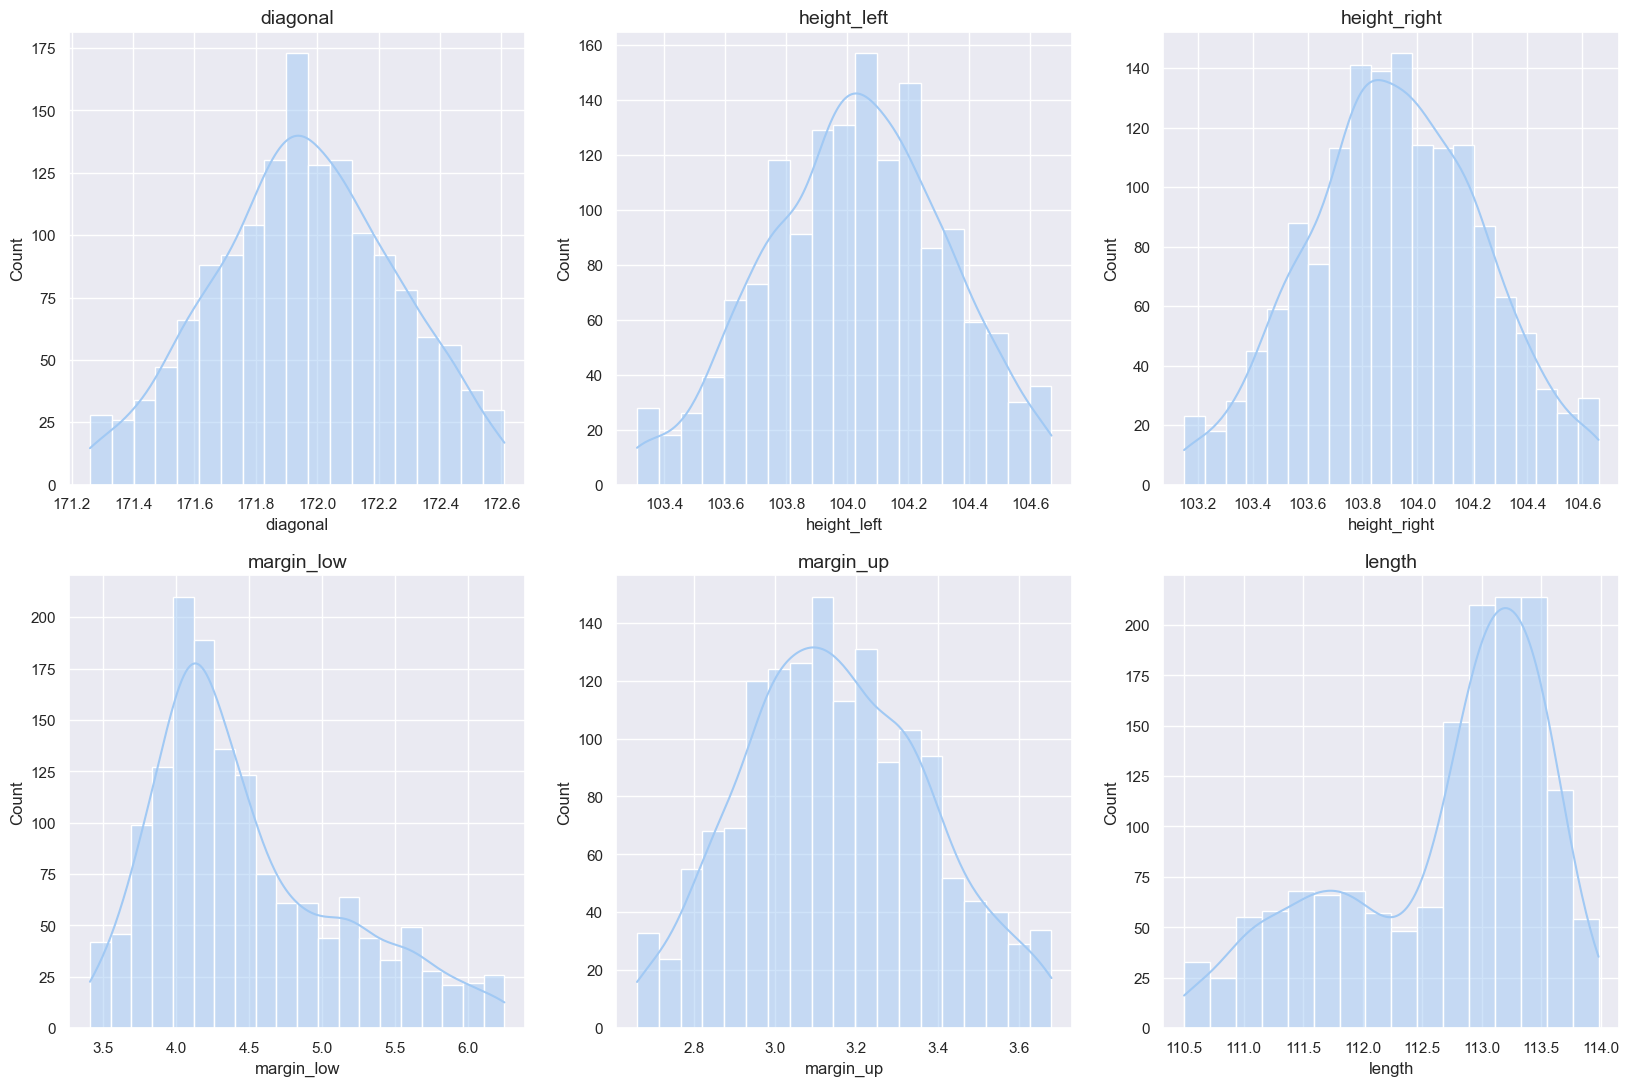

In [576]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_billets[column], kde=True)
    plt.title(column, fontsize=14)

plt.show()

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">4.5 PCA for Dimensionality Reduction:</span >

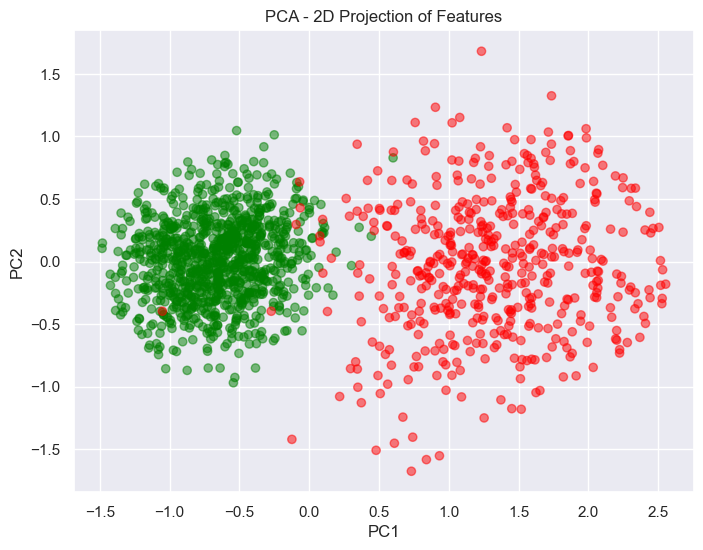

Explained Variance by PCA Components: [0.69782593 0.11520981]


In [578]:
# Select the features to apply PCA on
X = df_billets[features]
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Create a DataFrame with the 2D PCA components
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

# Plot the 2D PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, c=df_billets['is_genuine'].map({True: 'green', False: 'red'}))
plt.title("PCA - 2D Projection of Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
#-------------------------------------------------------
# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PCA Components: {explained_variance}")

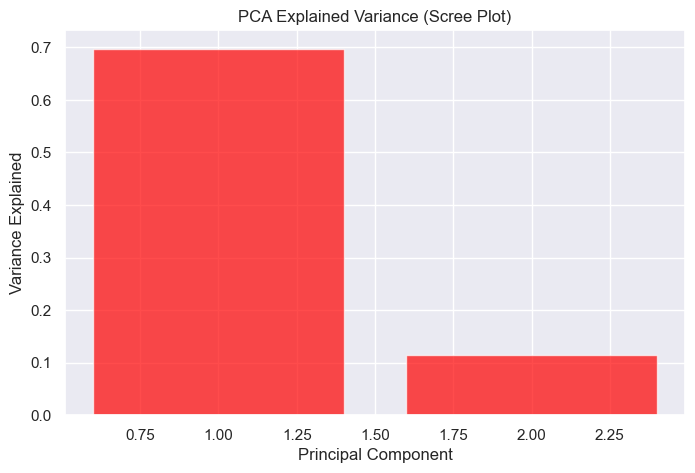

In [579]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='red')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance (Scree Plot)')
plt.show()

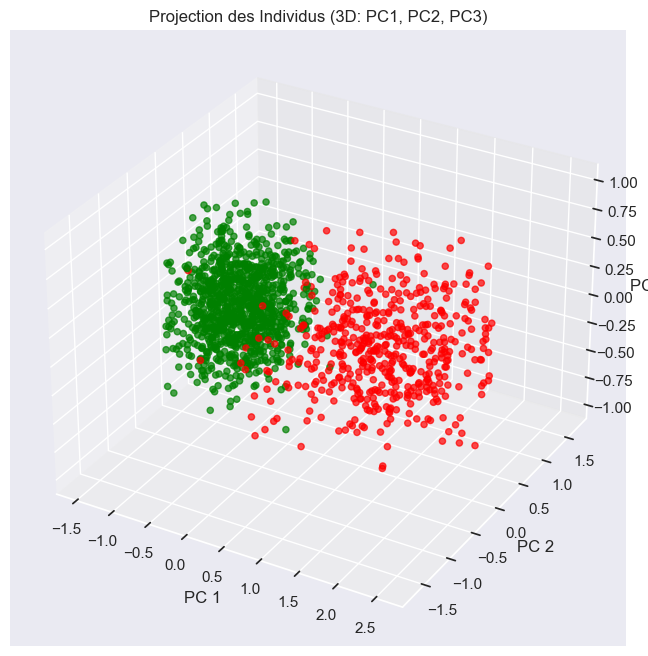

In [580]:
# Apply PCA to reduce the features to 3D
pca = PCA(n_components=3)
pca_components = pca.fit_transform(X)  # Use your features for PCA

# Create 3D scatter plot for PC1, PC2, PC3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c=df_billets['is_genuine'].map({True: 'green', False: 'red'}), alpha=0.7)
ax.set_title("Projection des Individus (3D: PC1, PC2, PC3)")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.show()


### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">4.6 Feature Engineering and Data Preprocessing:</span >

<h3 style="margin: auto; padding: 20px; color: RGB(61,130,152); ">4.6.1 Feature Scaling:</h3>
Standardize the features, so that all features are within a uniform range of mean 0 and standard deviation 1.

In [583]:
# Determine which features will be standardized
X = df_billets[features] 

# Unification application using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

# Convert the unified data back to a DataFrame for further analysis
df_scaled = pd.DataFrame(X_scaled, columns=features)

#------------------------------------------------------------
df_scaled


diagonal  height_left  height_right  margin_low  margin_up    length
0    -0.495288     2.172298      2.315391    0.059024  -1.145282  0.174096
1    -1.666842    -2.268203     -0.814051   -1.095879  -0.707338  0.475073
2     2.182549     1.528255     -1.314762   -0.125761  -0.926310  0.556106
3    -2.001571    -0.403871      0.062192   -1.326860  -0.619749  0.961267
4    -0.763072     0.850316     -1.439940   -0.680114   1.438588 -0.161609
...        ...          ...           ...         ...        ...       ...
1495 -0.696126     1.189286      0.781964   -0.094963  -0.269394 -1.620191
1496  0.776684     2.036710      1.626913    1.213927   0.956850 -1.979049
1497 -0.528761    -0.064901      0.625492    1.583496   0.913055 -0.844596
1498  0.341536     0.850316      0.437725    1.059940   1.350999 -0.497315
1499 -1.633369     0.409656     -0.313341    0.228410   0.956850 -0.705684

[1500 rows x 6 columns]

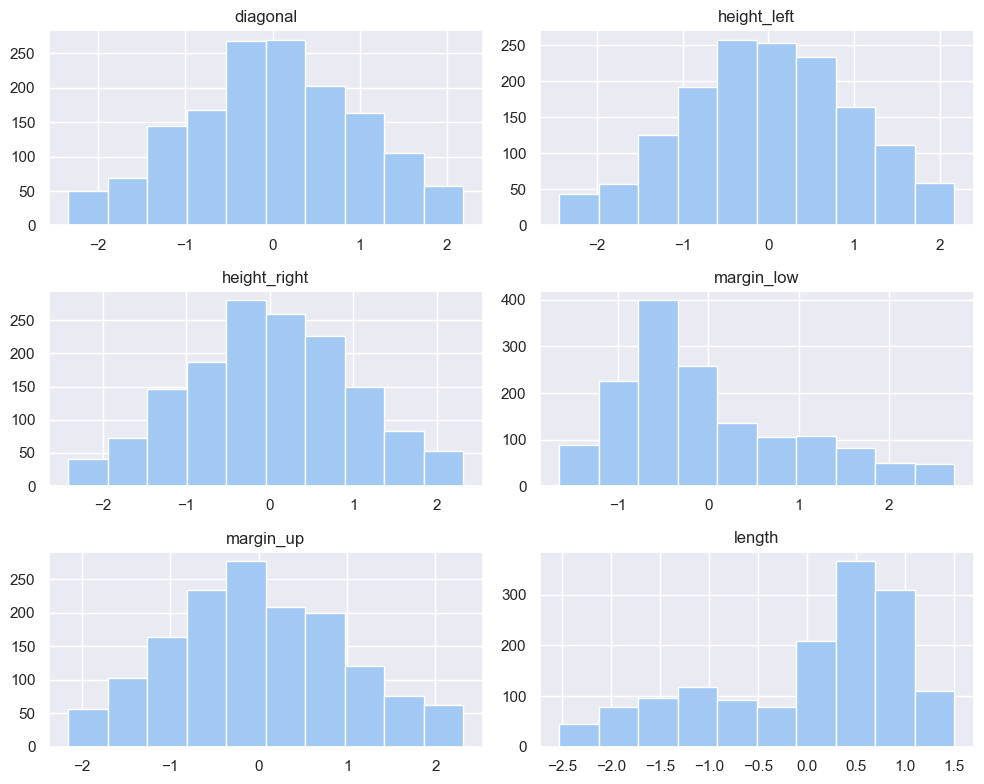

In [584]:
df_scaled.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


<h3 style="margin: auto; padding: 20px; color: RGB(61,130,152); ">4.6.2 Splitting the Data into Training and Testing Sets:</h3>

In [586]:
# Splitting the Data into Training and Test Sets
# -----------------------------------------------------------
# Partitioning scaled features (X_scaled) and target variables (y)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,  # Features (scaled using StandardScaler)
    df_billets['is_genuine'],  
    test_size=0.2,  
    random_state=42, 
    stratify=df_billets['is_genuine']  # Preserve class distribution
)

# Display the shapes of training and test sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1200, 6)
Shape of y_train: (1200,)
Shape of X_test: (300, 6)
Shape of y_test: (300,)


In [587]:
# Check the distribution of the target variable
class_counts = y_train.value_counts()
print("Training data class distribution:")
print(class_counts)

# If imbalance is detected, you can apply techniques like class weighting or oversampling.

Training data class distribution:
is_genuine
True     800
False    400
Name: count, dtype: int64


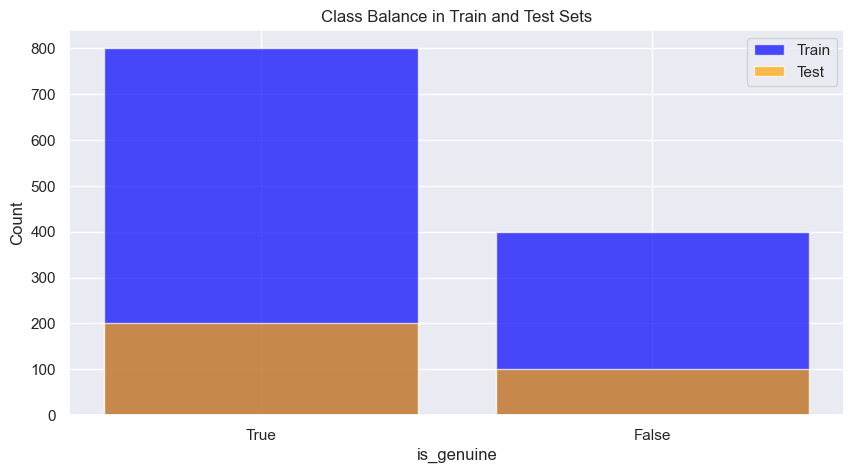

In [588]:
# Train-test balance visualization
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

plt.figure(figsize=(10, 5))
plt.bar(train_counts.index.astype(str), train_counts.values, alpha=0.7, label='Train', color='blue')
plt.bar(test_counts.index.astype(str), test_counts.values, alpha=0.7, label='Test', color='orange')
plt.title('Class Balance in Train and Test Sets')
plt.xlabel('is_genuine')
plt.ylabel('Count')
plt.legend()
plt.show()


-----------------
The correlation circle helps you interpret the results of PCA by showing which features have the strongest influence on the principal components. It can also highlight relationships (both positive and negative) between the features and help in understanding the underlying structure of the data.

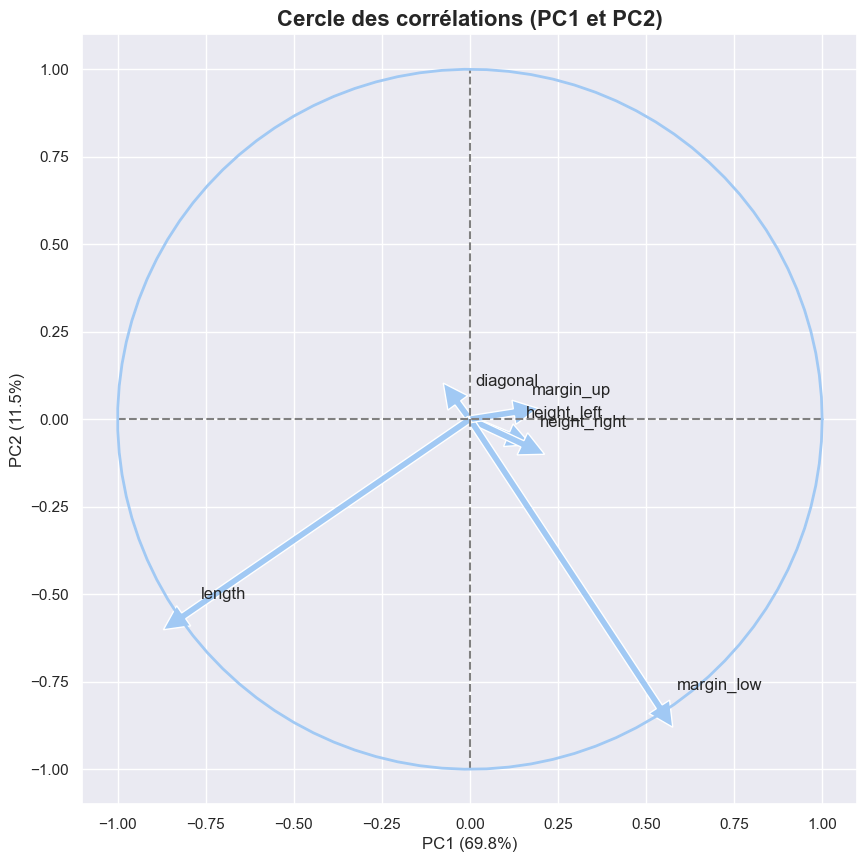

In [590]:
# Cercle des corrélations
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0, 0, 
             pca.components_[0, i],  # PC1
             pca.components_[1, i],  # PC2
             head_width=0.07, head_length=0.07, width=0.02)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             X.columns[i])

# Horizontal and vertical lines
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# Axis labels with explained variance ratio
plt.xlabel('PC{} ({}%)'.format(1, round(100 * pca.explained_variance_ratio_[0], 1)))
plt.ylabel('PC{} ({}%)'.format(2, round(100 * pca.explained_variance_ratio_[1], 1)))

# Title
plt.title("Cercle des corrélations (PC{} et PC{})".format(1, 2), fontsize=16, fontweight="bold")

# Adding the unit circle
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), 
         np.sin(np.linspace(0, 2 * np.pi, 100)), 
         linewidth=2)

plt.show()


---------------------
#### Scree Plot and Explained Variance
In this step, we calculate the explained variance for each principal component (PC) obtained from PCA. This tells us how much of the total data variability each component explainsnce.


*Explained Variance*: We calculate the percentage of variance explained by each principal component.

*Scree Plot*: We plot a bar chart to show how much variance each component explains. The cumulative variance (shown with a red line) helps us understand how many components we should keep.

*Interpretation*: We look for the point where the variance starts to level off (the "elbow"). This helps us decide how many components to keep, usually those that explain 80%-90% of the total variance.

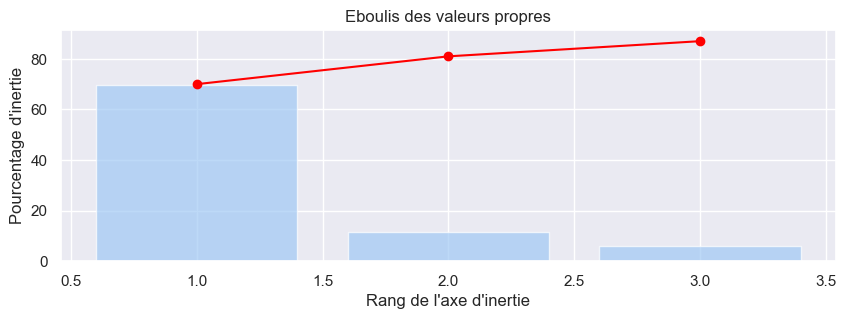

In [593]:
# Calculate explained variance as percentage
scree = (pca.explained_variance_ratio_ * 100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, len(scree) + 1)  # Update based on number of components

# Create figure and plot
plt.figure(figsize=(10, 3))
plt.bar(x_list, scree, alpha=0.7)
plt.plot(x_list, scree_cum, c="red", marker='o')  # Cumulative variance in red with circles
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()


----------------
**In this step, we use Ordinary Least Squares (OLS) regression to model the relationship between the geometric features of the bills and their authenticity (genuine or counterfeit).**

In [595]:
# OLS Regression Results (Linear Relationships)
import statsmodels.api as sm

# Add a constant for OLS
X_ols = sm.add_constant(df_billets[features])
y_ols = df_billets['is_genuine']

# Fit OLS regression
ols_model = sm.OLS(y_ols, X_ols).fit()

# Display results
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:             is_genuine   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1393.
Date:                Sat, 30 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:12:54   Log-Likelihood:                 414.72
No. Observations:                1500   AIC:                            -815.4
Df Residuals:                    1493   BIC:                            -778.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -12.5634      3.742     -3.357   

-----------------------
**The OLS regression model explains 84.8% of the variance in bill authenticity. All features are statistically significant (p-values < 0.05), with coefficients indicating their impact on the prediction. The model's R-squared and F-statistic show good overall fit, but there might be multicollinearity and autocorrelation issues, requiring further checks.**

-----------------------------------------------------------

## <span style="color:green; font-size:1.5em;">5. Building and training models and Evaluation</span>

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">5.1 Model Training and Evaluation Overview:</span >

 1. Train models using the training dataset.
 2. Evaluate each model on the testing dataset.
 3. Compare model performance using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.
 4. Fine tune models (if necessary) to improve performance.
- We will also perform a K-Means clustering for unsupervised learning to see if it can identify distinct groups within the dataset., and ROC-AUC.

----------------
## Objective:
Build and train several machine learning models to predict the authenticity of the banknotes. Compare their performance based on relevant metrics.

## Description:

**Model Selection**: Choose a variety of models (Logistic Regression,  Random Forest, etc.).

**Model Training**: Train each model on the training data.

**Model Evaluation**: Evaluate models using cross-validation and metrics like accuracy, precision, recall and F1-score.

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">5.2 Logistic Regression:</span >

The "is_genuine" column is unbalanced in the dataset:
Majority Category: Genuine bills 
Minority: Counterfeit bills
Class weights can be used to give more importance to the model, to the minority class during training, improving the detection of counterfeit bills.

In [604]:
# Logistic Regression with Class Weights
# -----------------------------------------------------------

# Initialize logistic regression with class weights
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)

# Training the model with training data
logistic_regression.fit(X_train, y_train)

# predictions about the test data
y_pred_logistic_regression = logistic_regression.predict(X_test)

# Evaluation of model performance
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic_regression))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic_regression))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       100
        True       1.00      0.98      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Logistic Regression Confusion Matrix:
[[100   0]
 [  3 197]]


In [605]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logistic_regression, X, df_billets['is_genuine'], cv=5)
print(f'Cross-Validation Accuracy: {scores.mean()}')


Cross-Validation Accuracy: 0.99


In [606]:
#checking the coefficients and intercept after training
print("Model Coefficients:", logistic_regression.coef_)
print("Model Intercept:", logistic_regression.intercept_)


Model Coefficients: [[ 0.20122978 -0.27822729 -0.80737143 -2.64785253 -1.65018164  3.69740584]]
Model Intercept: [1.2387668]


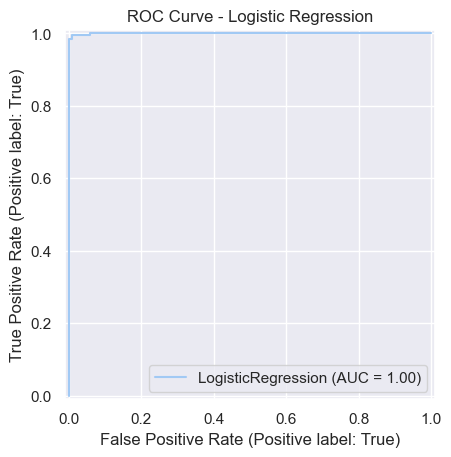

In [607]:
# ROC Curve
from sklearn.metrics import roc_auc_score, RocCurveDisplay
roc_logistic_regression = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1])
RocCurveDisplay.from_estimator(logistic_regression, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

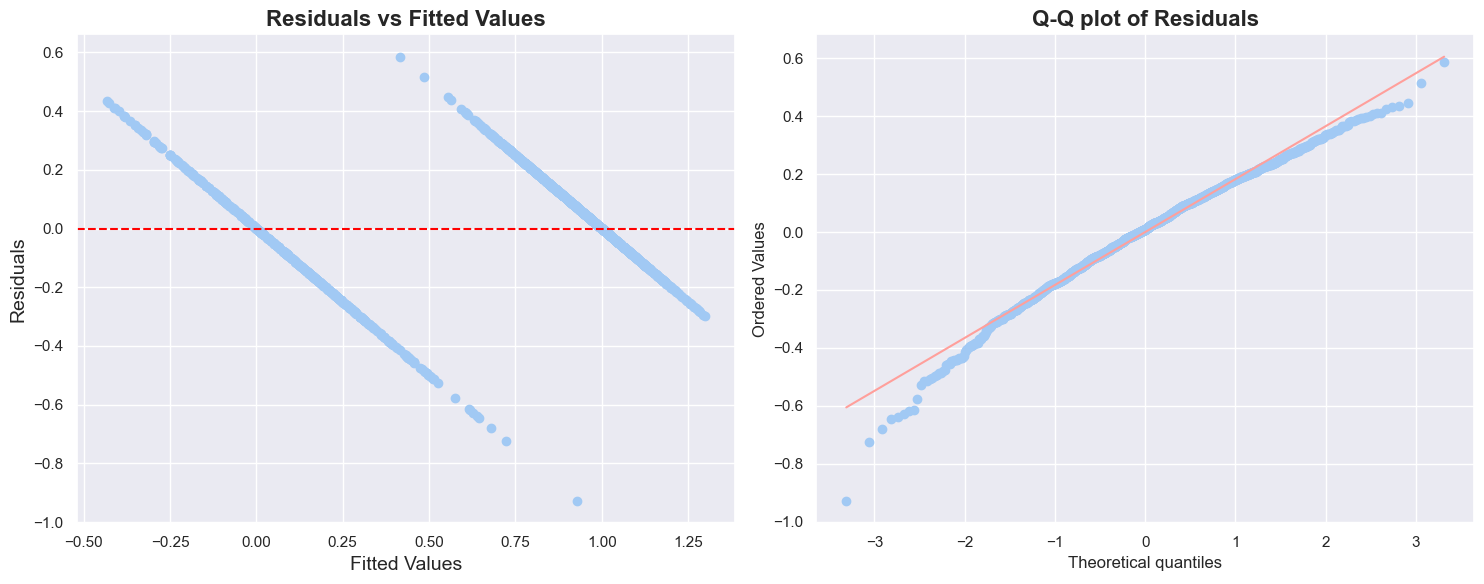

In [608]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st

# Assuming ols_model is already fitted
# Create a figure and axes for plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Residuals plot
axes[0].scatter(ols_model.fittedvalues, ols_model.resid)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Fitted Values', fontsize=14)
axes[0].set_ylabel('Residuals', fontsize=14)
axes[0].set_title('Residuals vs Fitted Values', fontsize=16, fontweight='bold')

# Q-Q plot for residuals
st.probplot(ols_model.resid, plot=axes[1])  # Q-Q plot of residuals
axes[1].set_title('Q-Q plot of Residuals', fontsize=16, fontweight='bold')

# Show the plots
plt.tight_layout()
plt.show()


In [609]:
# OLS Regression Results (Linear Relationships)
import statsmodels.api as sm

# Add a constant for OLS
X_ols = sm.add_constant(df_billets[features])
y_ols = df_billets['is_genuine']

# Fit OLS regression
ols_model = sm.OLS(y_ols, X_ols).fit()

# Display results
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:             is_genuine   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1393.
Date:                Sat, 30 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:12:57   Log-Likelihood:                 414.72
No. Observations:                1500   AIC:                            -815.4
Df Residuals:                    1493   BIC:                            -778.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -12.5634      3.742     -3.357   

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">5.3 K-Means Clustering:</span >

It is a clustering model, not a classification one, but you can use its centroids as an indication to determine the defining classes (Real or fake)

In [612]:
# Apply K-Means Clustering to training data
# 2 classes: genuine and counterfeit
kmeans = KMeans(n_clusters=2, random_state=42) 
kmeans.fit(X_train)  


# Extract the centroids of the clusters
centroids = kmeans.cluster_centers_  

# Calculate distances from each centroid
distances = np.linalg.norm(X_test[:, np.newaxis] - centroids, axis=2)  

# Assign the test data points to the closest centroid
y_pred_kmeans = np.argmin(distances, axis=1)

# ----------------------------------------------------------

print("K-Means Classification Report:")
print(classification_report(y_test, y_pred_kmeans))
# ----------------------------------------------------------
# Evaluate clustering
silhouette = silhouette_score(X_train, kmeans.labels_)
print(f"K-Means Silhouette Score: {silhouette}")


K-Means Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300

K-Means Silhouette Score: 0.34567195977473336


Visualizing the Clusters and Centroids
--------------------------------------

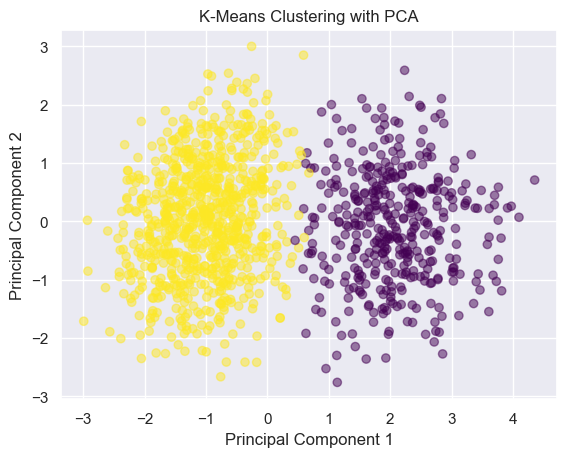

In [614]:
# PCA Visualization of Clusters
pca_kmeans = PCA(n_components=2).fit_transform(X_train)
plt.scatter(pca_kmeans[:, 0], pca_kmeans[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">5.4 K-Nearest Neighbors (KNN):</span >

In [616]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#---------------------------------------------------------------------------------
# KNN model with class weights
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training set
knn.fit(X_train, y_train)

# Prediction using test set
y_pred_knn = knn.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn)) 

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.97      0.97       100
        True       0.99      0.99      0.99       200

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Random Forest Confusion Matrix:
[[ 97   3]
 [  2 198]]


### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">5.5 Random Forest:</span >

In [618]:
# Random Forest with Class Weights
# -----------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
# -----------------------------------------------------------

# Initializing a random forest with class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Training the model on training data
rf.fit(X_train, y_train)

# Predictions about test data
y_pred_rf = rf.predict(X_test)

# Evaluate model performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Random Forest Confusion Matrix:
[[ 98   2]
 [  1 199]]


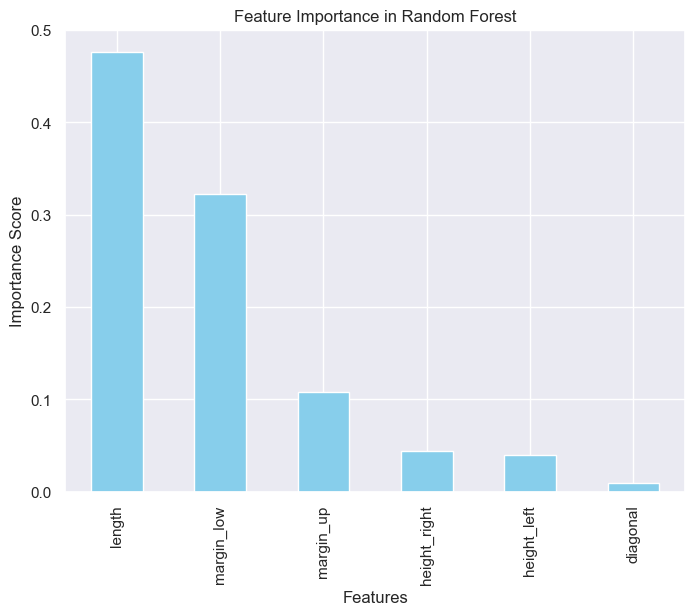

In [619]:
# Extracting feature importance from Random Forest model
feature_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)


plt.figure(figsize=(8, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance in Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()


### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">5.6 Compare models:</span >

In [621]:
print("---------------Logistic Regression Performance:---------------")
print(classification_report(y_test, y_pred_logistic_regression))

print("---------------Random Forest Performance:---------------")
print(classification_report(y_test, y_pred_rf))

print("---------------KNN Performance:---------------")
print(classification_report(y_test, y_pred_knn))

print("---------------K-Means Performance:---------------")
print(classification_report(y_test, y_pred_kmeans))

---------------Logistic Regression Performance:---------------
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       100
        True       1.00      0.98      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

---------------Random Forest Performance:---------------
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

---------------KNN Performance:---------------
              precision    recall  f1-score   support

       False       0.98      0.97      0.97       100
        True       0.99      0.99      0.99       200

    accuracy   

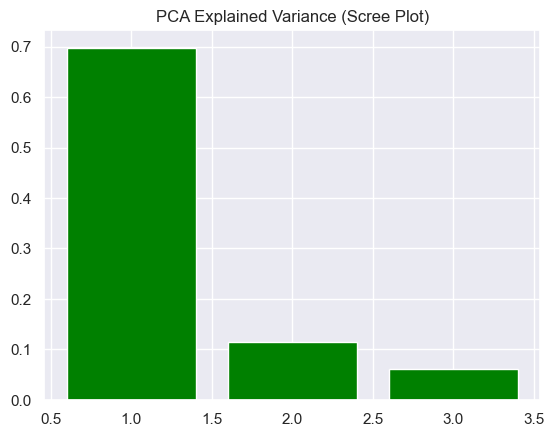

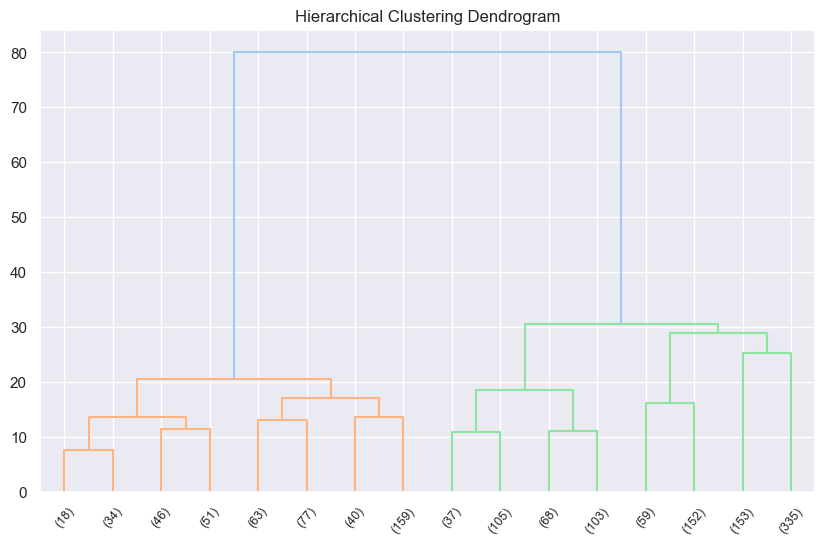

Feature: diagonal, T-statistic: 5.21 , P-value: 2.15e-07
Feature: height_left, T-statistic: -16.00 , P-value: 2.48e-53
Feature: height_right, T-statistic: -21.65 , P-value: 1.23e-90
Feature: margin_low, T-statistic: -50.10 , P-value: 1.98e-322
Feature: margin_up, T-statistic: -29.76 , P-value: 2.83e-153
Feature: length, T-statistic: 63.23 , P-value: 0.00e+00


In [622]:
# PCA Scree Plot
explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='green')
plt.title("PCA Explained Variance (Scree Plot)")
plt.show()
# Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=3, leaf_rotation=50, leaf_font_size=9)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()
# Statistical Hypothesis Testing
for feature in features:
    t_stat, p_val = ttest_ind(true_bills[feature], false_bills[feature])
    print(f"Feature: {feature}, T-statistic: {t_stat:.2f} , P-value: {p_val:.2e}")


---------------------------
**All features in the model are highly statistically significant, with very low p-values . This confirms that each of these features plays a crucial role in predicting the target variable (is_genuine). The T-statistics further support that these features have strong and meaningful relationships with the outcome, with margin_low and length showing particularly strong effects.**

--------------------------------

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">5.7 Selecting the Best Model:</span >

In [625]:
def compare_models(y_test, model_predictions, model_names):
    metrics = []

    # Iterate over models and compute metrics
    for i, y_pred in enumerate(model_predictions):
        
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Extract key metrics for the 'weighted avg'
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1_score = report['weighted avg']['f1-score']
        accuracy = report['accuracy']
        
        # Add metrics to the list
        metrics.append({
            'Model': model_names[i],
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1_score,
            'Accuracy': accuracy
        })

    # Create a DataFrame for easy visualization
    df_results= pd.DataFrame(metrics)
    return df_results.sort_values(by='F1-Score', ascending=False) 

# ----------------------------------------------------------
# Predictions from different models
model_predictions = [y_pred_logistic_regression, y_pred_rf, y_pred_knn, y_pred_kmeans]
model_names = ['Logistic Regression', 'Random Forest', 'KNN', 'K-Means']

# Compare models
comparison_table = compare_models(y_test, model_predictions, model_names)
print(comparison_table)


                 Model  Precision    Recall  F1-Score  Accuracy
0  Logistic Regression   0.990291  0.990000  0.990036  0.990000
1        Random Forest   0.989999  0.990000  0.989987  0.990000
3              K-Means   0.986667  0.986667  0.986667  0.986667
2                  KNN   0.983316  0.983333  0.983312  0.983333


In [626]:
# Selecting the best model 
best_model = comparison_table.iloc[0]['Model']
print(f"The best model is: {best_model}")


The best model is: Logistic Regression


### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">5.8 Handle Class Imbalance with Resampling:</span >


In [628]:
# Evaluate performance on the training set
y_pred_train = logistic_regression.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Training Set):\n", cm_train)

train_report = classification_report(y_train, y_pred_train)
print("\nTraining Classification Report:\n", train_report)


Confusion Matrix (Training Set):
 [[393   7]
 [  4 796]]

Training Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.98      0.99       400
        True       0.99      0.99      0.99       800

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



In [629]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Re-train the model
logistic_regression.fit(X_resampled, y_resampled)

# Evaluate on the test set again
y_pred_smote = logistic_regression.predict(X_test)
cm_smote = confusion_matrix(y_test, y_pred_smote)
print("Confusion Matrix after SMOTE:\n", cm_smote)

smote_report = classification_report(y_test, y_pred_smote)
print("\nClassification Report after SMOTE:\n", smote_report)


Confusion Matrix after SMOTE:
 [[ 99   1]
 [  1 199]]

Classification Report after SMOTE:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



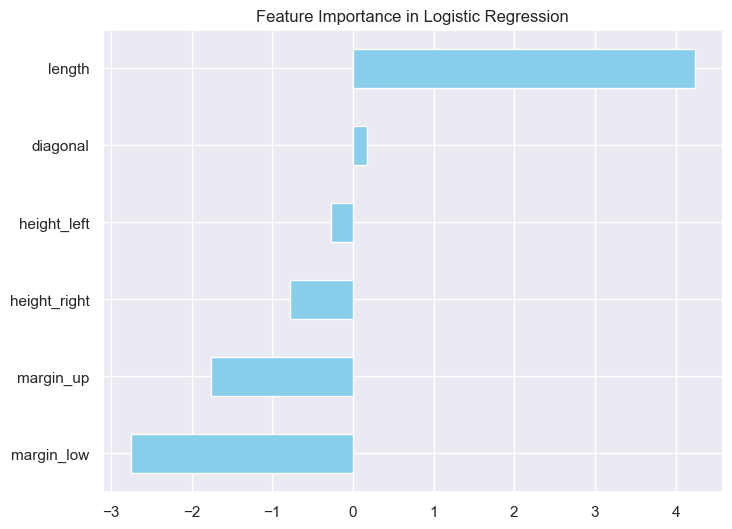

In [630]:
# Feature importance from coefficients
feature_importance = pd.Series(logistic_regression.coef_[0], index=features)
feature_importance.sort_values().plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title("Feature Importance in Logistic Regression")
plt.show()


## <span style="color:green; font-size:1.5em;">6. Adding Extra Columns and Model Tuning </span>

## Objective:
Fine-tune the model and add predictions to the dataset. Save the outputs for further analysis or deployment.

## Description:

**Model Tuning**: Apply hyperparameter tuning to improve the model’s performance using techniques like Grid Search or Random Search.

**Add Predictions**: Once the model is finalized, make predictions on the test set and add them to the original dataset.

**Save Results**: Save the dataset with predictions to a file or database for further use.


### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">6.1 Add Predictions (Predicted Probabilities):</span >

In [635]:
# Add an 'Id' column for unique identification
df_billets['Id'] = ['A_' + str(i + 1) for i in range(len(df_billets))]

# Ensure 'Probability of Prediction' column is properly assigned
df_billets['Probability of Prediction'] = logistic_regression.predict_proba(X_scaled)[:, 1]

# Assign 'Prediction' based on a threshold (0.5)
df_billets['Prediction'] = df_billets['Probability of Prediction'] > 0.5


### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">6.2  Create Final Results Table:</span >

In [637]:
# Select and organize columns for the final table
final_results = df_billets[['Id', 'diagonal', 'height_left', 'height_right', 'margin_low', 
                            'margin_up', 'length', 'is_genuine', 'Probability of Prediction', 
                            'Prediction']]

# Save the results to a CSV file (optional)
final_results.to_csv('final_results.csv', index=False)
final_results


Id  diagonal  height_left  height_right  margin_low  margin_up  \
0        A_1    171.81       104.67        104.66        4.52       2.89   
1        A_2    171.46       103.36        103.66        3.77       2.99   
2        A_3    172.61       104.48        103.50        4.40       2.94   
3        A_4    171.36       103.91        103.94        3.62       3.01   
4        A_5    171.73       104.28        103.46        4.04       3.48   
...      ...       ...          ...           ...         ...        ...   
1495  A_1496    171.75       104.38        104.17        4.42       3.09   
1496  A_1497    172.19       104.63        104.44        5.27       3.37   
1497  A_1498    171.80       104.01        104.12        5.51       3.36   
1498  A_1499    172.06       104.28        104.06        5.17       3.46   
1499  A_1500    171.47       104.15        103.82        4.63       3.37   

      length  is_genuine  Probability of Prediction  Prediction  
0     112.83        True                   0.829860        True  
1     113.09        True                   0.999836        True  
2     113.16        True                   0.998860        True  
3     113.51        True                   0.999955        True  
4     112.54        True                   0.703786        True  
...      ...         ...                        ...         ...  
1495  111.28       False                   0.003300       False  
1496  110.97       False                   0.000001       False  
1497  111.95       False                   0.000178       False  
1498  112.25       False                   0.001572       False  
1499  112.07       False                   0.018196       False  

[1500 rows x 10 columns]

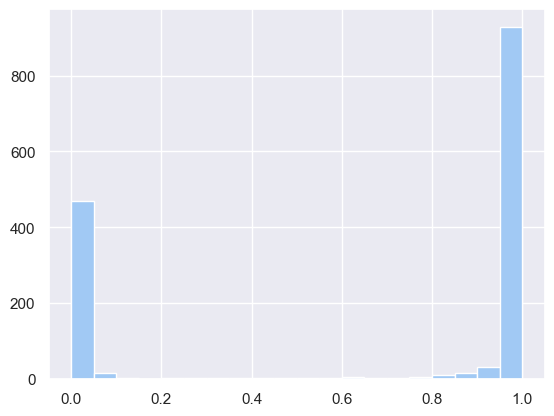

In [638]:
import matplotlib.pyplot as plt
plt.hist(df_billets['Probability of Prediction'], bins=20)
plt.show()

### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">6.3 Save and Load the Model:</span >

In [640]:
import joblib

# Save the best model and scaler
joblib.dump(logistic_regression, 'best_model.pkl')  
joblib.dump(scaler, 'scaler.pkl')

# Load the model and scaler
model = joblib.load('best_model.pkl')
scaler = joblib.load('scaler.pkl')

### Confusion Matrix:
----------------------

In [642]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[ 99   1]
 [  1 199]]


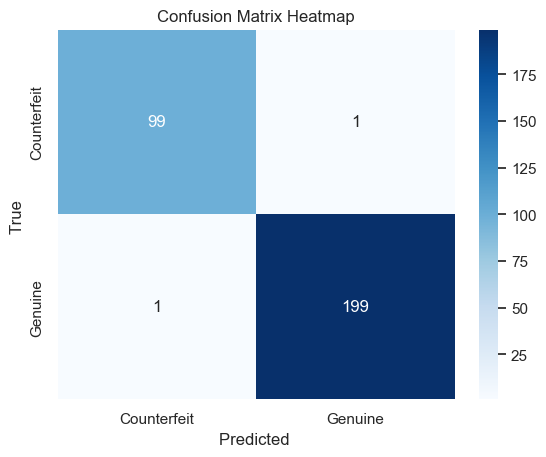

In [643]:
# Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Counterfeit', 'Genuine'], yticklabels=['Counterfeit', 'Genuine'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted ")
plt.ylabel("True ")
plt.show()


In [644]:
print("Predicted values distribution:", pd.Series(y_pred).value_counts())


Predicted values distribution: True     200
False    100
Name: count, dtype: int64


### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">6.4 Reload the Model and Evaluate on Test Data:</span >

In [646]:
from sklearn.metrics import accuracy_score

# Load the saved model
loaded_model = joblib.load('best_model.pkl')
print("Model loaded successfully!")

# Make predictions
y_pred = loaded_model.predict(X_test)
y_pred_prob = loaded_model.predict_proba(X_test)[:, 1]

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model loaded successfully!
Evaluation Metrics:
Accuracy: 0.99
ROC-AUC: 1.00

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Confusion Matrix:
[[ 99   1]
 [  1 199]]


### <span style="font-size:1.2em;margin: auto; padding: 20px; color: RGB(51,165,182);">6.5 Test on New Data:</span >

In [648]:
# Evaluate performance on the training set
y_pred_train = logistic_regression.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Training Set):\n", cm_train)

train_report = classification_report(y_train, y_pred_train)
print("\nTraining Classification Report:\n", train_report)


Confusion Matrix (Training Set):
 [[394   6]
 [  3 797]]

Training Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.98      0.99       400
        True       0.99      1.00      0.99       800

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



In [ ]:
# Input for testing
print("Enter feature values for the banknote:")
diagonal = float(input("Diagonal: "))
height_left = float(input("Height Left: "))
height_right = float(input("Height Right: "))
margin_low = float(input("Margin Low: "))
margin_up = float(input("Margin Up: "))
length = float(input("Length: "))

# Inputs into a list
data = [[diagonal, height_left, height_right, margin_low, margin_up,length]]

# Scale the new data using the saved scaler
new_data_scaled = scaler.transform(data)

# Predict using the loaded model
new_prediction = model.predict(new_data_scaled)

# The result

print(f"\nPredicted Class for New Data: {'Genuine' if new_prediction[0] else 'Counterfeit'}")

Enter feature values for the banknote:


## <span style="color:green; font-size:1.5em;">7. Model Deployment(the Streamlit Application):</span>

In this step, I used the Streamlit library to distribute a logistic regression model . With this application Users can upload a CSV file containing their data. and the app will process it immediately The model then stores the velocity based on the input data and displays results probability for each row of data. 

**App_Billets.py**

----------
The Streamlit app  have provides   way to deploy a logistic regression model for predicting whether items are genuine or not, based on a dataset with key features like diagonal, height_left, height_right, margin_low, margin_up, and length. Users can upload their own CSV files, and the app will process the data, make predictions, and display the results, including the predicted class and the associated probabilities.

-----------

## <span style="color:green; font-size:1.5em;">8. Conclusion:</span>

1. **Model Training**:   We began by training multiple machine learning models, including logistic regression, random forest, KNN, and K-means clustering, using the provided dataset. After evaluating the models based on metrics like F1-score, accuracy, precision, and recall, the logistic regression model emerged as the best performer. With an R-squared value of 0.848, it explains 84.8% of the variance in predicting whether items are genuine, demonstrating its effectiveness.ctions.ta point.

2. **Evaluation**:
   
- The evaluation of the model was done using classification reports that provided key metrics such as precision, recall, F1-score, and accuracy. These metrics confirmed that the logistic regression model's predictions were statistically significant and reliable. Additionally, the importance of key features, such as `diagonal`, `height_left`, and `margin_low`, was assessed, highlighting their role in driving the model's predictions.

### ------------------------------------------------------------------------------------------------------------------------------

<div style="display: flex; background-color: RGB(66,108,100);" >
<h3 style="margin: auto; padding: 20px; font-size:2em;color:#fff; ">"Completed"</h3>
</div>